In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

label1 = 'Fine-tuned'
label2 = 'Original'
sub_title = 'Mistral 7B_q4_k_m before and after Fine-tuning'

### Arithmetics

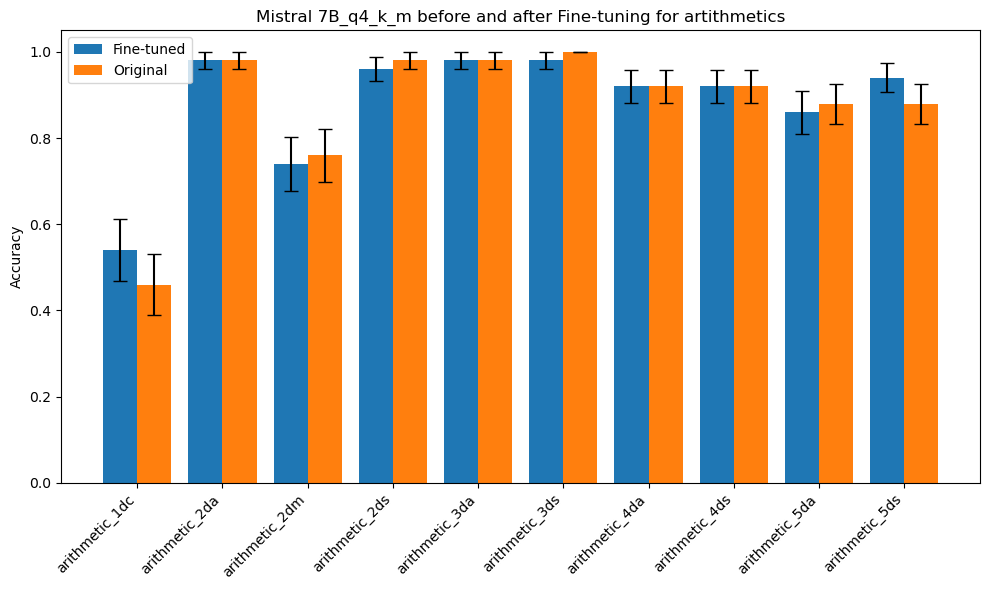

In [2]:
dataset = 'artithmetics'

# Load data for model 1 from the JSON file
with open('finetuned_arithmetic_evalResults/results_2024-09-14T17-38-30.057033.json', 'r') as f:
    data_model_1 = json.load(f)
with open('original_arithmetic_evalResults/results_2024-09-14T15-11-39.490525.json', 'r') as f:
    data_model_2 = json.load(f) 

# Extract the results
results_model_1 = data_model_1['results']
results_model_2 = data_model_2['results']

# Prepare lists to store the data
tasks = []
acc_model_1 = []
stderr_model_1 = []
acc_model_2 = []
stderr_model_2 = []

# Populate the lists with the relevant data from both models
for task, result in results_model_1.items():
    tasks.append(task)
    acc_model_1.append(result['acc,none'])
    stderr_model_1.append(result['acc_stderr,none'])
    acc_model_2.append(results_model_2[task]['acc,none'])
    stderr_model_2.append(results_model_2[task]['acc_stderr,none'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(tasks))

# Plot model 1 results
ax.bar(x - 0.2, acc_model_1, width=0.4, label=label1, yerr=stderr_model_1, capsize=5)

# Plot model 2 results (identical in this case)
ax.bar(x + 0.2, acc_model_2, width=0.4, label=label2, yerr=stderr_model_2, capsize=5)

# Add labels, title, and grid
ax.set_ylabel('Accuracy')
ax.set_title(sub_title+f' for {dataset}')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### All Accuracies

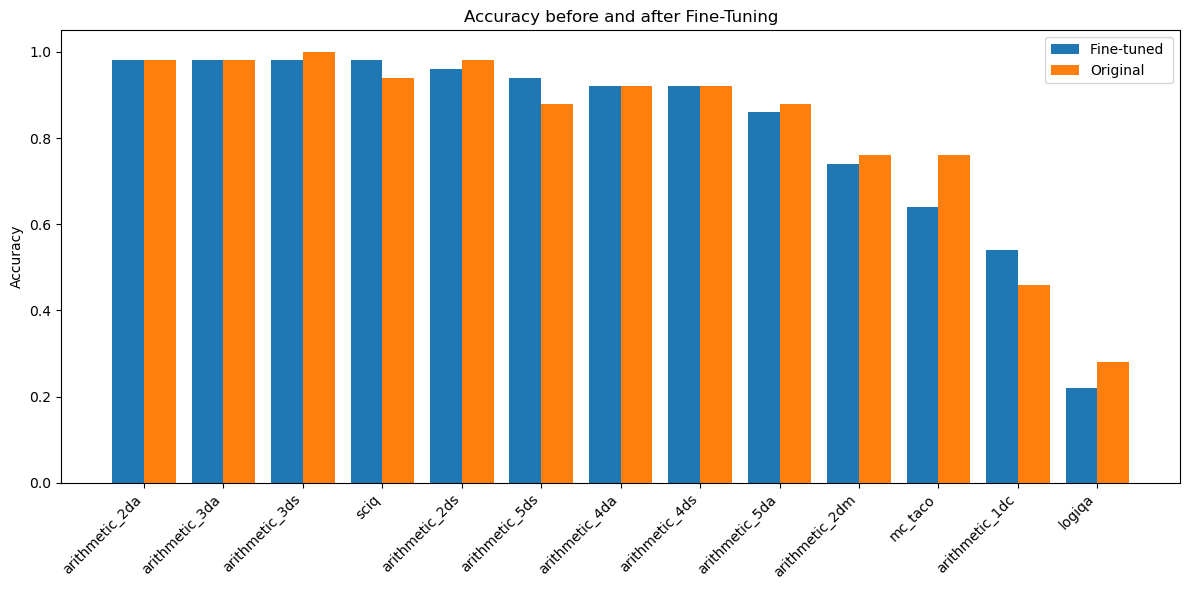

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual lists of file paths for both models
model_1_files = [
    'finetuned_mc_taco_evalResults/results_2024-09-14T18-20-27.796164.json', 
    'finetuned_arithmetic_evalResults/results_2024-09-14T17-38-30.057033.json',
    'finetuned_sciq_evalResults/results_2024-09-14T18-15-30.513794.json',
    'finetuned_eval_logiqa_results/results_2024-09-16T17-49-37.154681.json',
    'finetuned_eval_codexglue_code2text_results/results_2024-09-16T19-15-42.075638.json'
]
model_2_files = [
    'original_mc_taco_evalResults/unsloth__mistral-7b-bnb-4bit/results_2024-09-14T16-03-38.875262.json', 
    'original_arithmetic_evalResults/results_2024-09-14T15-11-39.490525.json',
    'original_sciq_evalResults/unsloth__mistral-7b-bnb-4bit/results_2024-09-14T15-24-08.081999.json',
    'original_logiqa_evalResults/unsloth__mistral-7b-bnb-4bit/results_2024-09-14T15-45-08.855640.json',
    'finetuned_eval_codexglue_code2text_results/results_2024-09-16T19-15-42.075638.json'
]

# Initialize lists to store tasks and accuracy values for both models
tasks = []
acc_model_1 = []
acc_model_2 = []

# Function to extract accuracy values from a single JSON file
def extract_accuracies(file_path, task_list, acc_list):
    with open(file_path, 'r') as f:
        data = json.load(f)
        results = data.get('results', {})
        for task, result in results.items():
            if 'acc,none' in result:
                # Single accuracy value
                task_list.append(task)
                acc_list.append(result['acc,none'])
            else:
                # Handle multiple accuracy types
                for key, value in result.items():
                    if key.startswith('acc'):
                        task_list.append(f"{task}_{key}")
                        acc_list.append(value)

# Extract accuracy data from Model 1 files
for file_path in model_1_files:
    extract_accuracies(file_path, tasks, acc_model_1)

# Extract accuracy data from Model 2 files (ensure the tasks match with Model 1)
for file_path in model_2_files:
    acc_temp = []
    extract_accuracies(file_path, [], acc_temp)
    acc_model_2.extend(acc_temp)

# Ensure both lists (Model 1 and 2) have the same number of accuracy values
assert len(acc_model_1) == len(acc_model_2), "Mismatch in dataset lengths between Model 1 and Model 2"

# Combine tasks and accuracy values into tuples and sort by Model 1 accuracy (highest to lowest)
sorted_data = sorted(zip(tasks, acc_model_1, acc_model_2), key=lambda x: x[1], reverse=True)

# Unzip the sorted data
tasks_sorted, acc_model_1_sorted, acc_model_2_sorted = zip(*sorted_data)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(tasks_sorted))

# Plot accuracies for Model 1 and Model 2
ax.bar(x - 0.2, acc_model_1_sorted, width=0.4, label='Fine-tuned ', capsize=5)
ax.bar(x + 0.2, acc_model_2_sorted, width=0.4, label='Original', capsize=5)

# Add labels, title, and grid
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy before and after Fine-Tuning')
ax.set_xticks(x)
ax.set_xticklabels(tasks_sorted, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Code X Glue

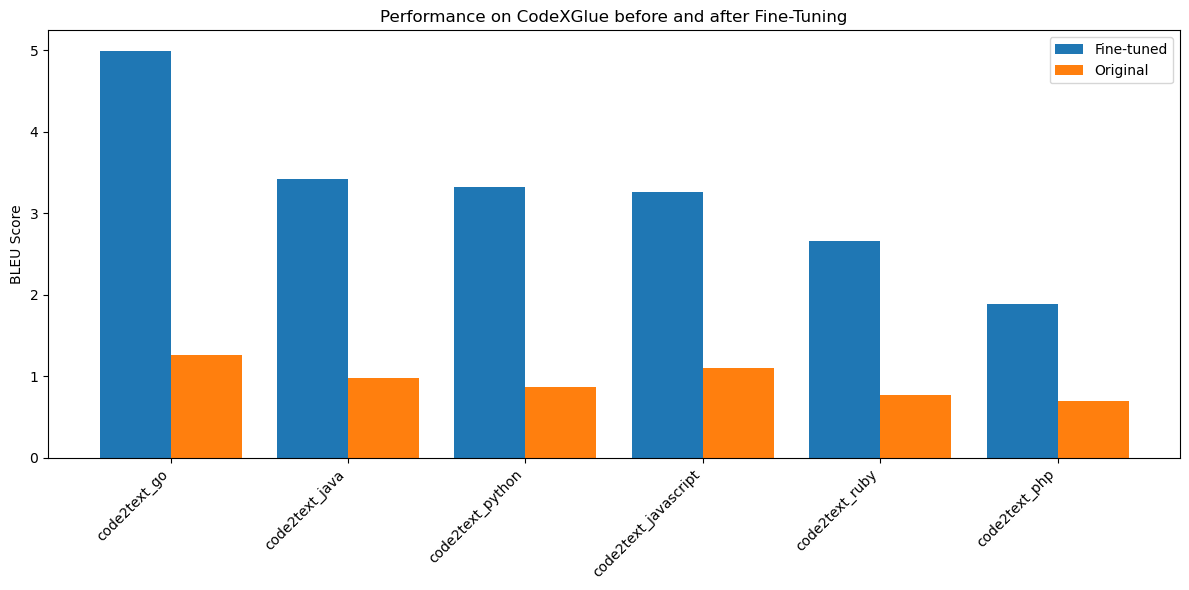

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON files for Model 1 and Model 2
with open('finetuned_eval_codexglue_code2text_results/results_2024-09-16T19-15-42.075638.json', 'r') as f_model_1, \
     open('original_codexglue_code2text_evalResults/content/original_codexglue_code2text_evalResults/unsloth__mistral-7b-bnb-4bit/results_2024-09-16T23-16-49.567404.json', 'r') as f_model_2:  # Assume model 2 has similar data structure
    data_model_1 = json.load(f_model_1)
    data_model_2 = json.load(f_model_2)

# Extract the results for both models
results_model_1 = data_model_1['results']
results_model_2 = data_model_2['results']

# Prepare lists to store task names and BLEU scores for both models
tasks = []
bleu_model_1 = []
bleu_model_2 = []

# Function to extract BLEU scores
def extract_bleu_scores(results, task_list, bleu_list):
    for task, result in results.items():
        if 'smoothed_bleu_4,none' in result:
            task_list.append(task)
            bleu_list.append(result['smoothed_bleu_4,none'])

# Extract BLEU scores for both models
extract_bleu_scores(results_model_1, tasks, bleu_model_1)
extract_bleu_scores(results_model_2, [], bleu_model_2)  # Assuming tasks are the same

# Combine tasks and BLEU scores into tuples and sort by Model 1 BLEU scores (from highest to lowest)
sorted_data = sorted(zip(tasks, bleu_model_1, bleu_model_2), key=lambda x: x[1], reverse=True)

# Unzip the sorted data
tasks_sorted, bleu_model_1_sorted, bleu_model_2_sorted = zip(*sorted_data)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(tasks_sorted))

# Plot BLEU scores for Model 1 and Model 2
ax.bar(x - 0.2, bleu_model_1_sorted, width=0.4, label='Fine-tuned', capsize=5)
ax.bar(x + 0.2, bleu_model_2_sorted, width=0.4, label='Original', capsize=5)

# Add labels, title, and grid
ax.set_ylabel('BLEU Score')
ax.set_title('Performance on CodeXGlue before and after Fine-Tuning')
ax.set_xticks(x)
ax.set_xticklabels(tasks_sorted, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()